# Feature Selection Notebook (nyi malik et nour)

Use this template notebook to try a FeatureExtractor and test it on different simple models.

In [13]:
from problem import get_train_data, get_test_data
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
# Loading data
X, y = get_train_data()

## Little bit of EDA before we craft some features

In [4]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def get_stat_vectors(X, y):
    '''Computes the mean, variance, and std feature vector corresponding to each label'''
    mean_vectors = []
    var_vectors  = []
    std_vectors  = []
    
    for label in range(256):
        mean_vector = X[y==label].mean(axis=0)
        mean_vectors.append(mean_vector)
        
        var_vector = X[y==label].var(axis=0)
        var_vectors.append(var_vector)
        
        std_vector = X[y==label].std(axis=0)
        std_vectors.append(std_vector)
        
    
    return np.array(mean_vectors), np.array(var_vectors), np.array(std_vectors)

def get_sum(v, metric='euclidean'):
    return pairwise_distances(v, metric=metric).sum(axis=0)

In [5]:
# We compute mean label vectors
mean_vectors, var_vectors, std_vectors = get_stat_vectors(X, y)

In [7]:
print(mean_vectors[:2])
print(var_vectors[:2])
print(std_vectors[:2])

[[20.11445783 19.28915663 14.90361446 ... -2.          7.45783133
  13.84337349]
 [19.68888889 18.82777778 14.66111111 ... -2.16666667  7.28888889
  13.78888889]]
[[ 8.13833516  7.79466959  8.49974443 ... 10.03636364  6.85578678
   3.58744067]
 [ 7.63451273  8.22157045 10.72808814 ... 13.52513966  8.9663563
   4.13395407]]
[[2.85277675 2.79189355 2.91543212 ... 3.16802204 2.61835574 1.89405403]
 [2.7630622  2.8673281  3.27537603 ... 3.6776541  2.99438747 2.03321274]]


In [22]:
mean_vectors.shape

(256, 700)

In [23]:
var = mean_vectors.var(axis=0)
print(var.shape)

(700,)


(700, 1)


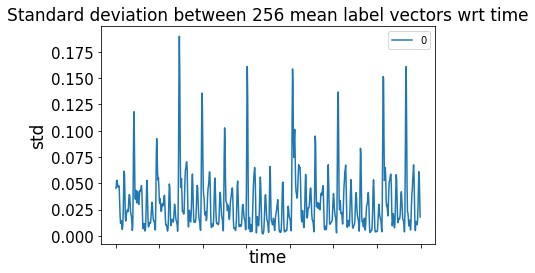

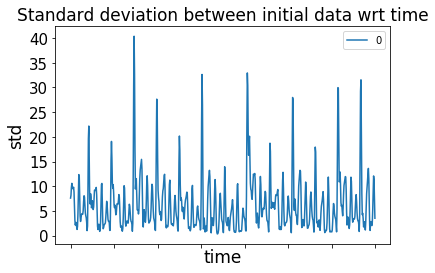

146
146


In [46]:
plt.figure(figsize=(20,10))
df_var = pd.DataFrame(var)
df_var.plot()
plt.title("Standard deviation between 256 mean label vectors wrt time",fontsize=17)
plt.xlabel("time",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("std",fontsize=17)
plt.yticks(fontsize=15)


plt.figure(figsize=(20,10))
df_var_X = pd.DataFrame(X.var(axis=0))
df_var_X.plot()
plt.title("Standard deviation between initial data wrt time",fontsize=17)
plt.xlabel("time",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("std",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

print(np.argmax(df_var.values))
print(np.argmax(df_var_X.values))

In [78]:
X_var = X.values.var(axis=0)

In [80]:
type(X_var)

numpy.ndarray

In [68]:
np.argpartition(X_var, -6)[-6:].values

array([145, 667, 302, 147, 406, 146])

In [97]:

g = [X.values[:,i-5:i+5] for i in l]
g[0].shape

(50000, 10)

In [88]:
X.values[145-5:145+5]

array([[19, 19, 16, ..., -5,  6, 12],
       [24, 22, 16, ...,  1,  9, 14],
       [19, 19, 15, ..., -5,  5, 13],
       ...,
       [21, 20, 18, ..., -6,  5, 12],
       [18, 16, 11, ...,  0,  9, 14],
       [19, 19, 17, ..., -8,  3, 11]], dtype=int8)

In [133]:
peaks_indices = [145, 667, 302, 406]
z = np.concatenate([X.values[:,i-5:i+5] for i in peaks_indices], axis=1)
#X_1 = X[145-5:145+5]


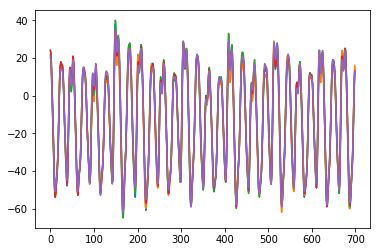

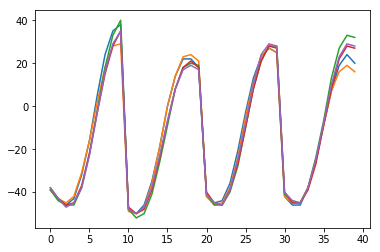

/Users/nour/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


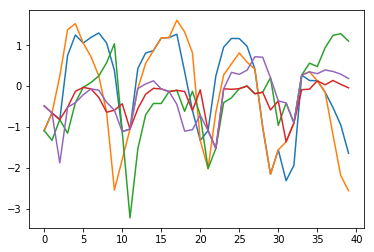

In [124]:
for i in range(5):
    plt.plot([i for i in range(700)], X.values[i])
plt.show()

for i in range(5): 
    plt.plot([i for i in range(40)], z[i])
plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(z, y)
z_scaled = scaler.transform(z)
for i in range(5): 
    plt.plot([i for i in range(40)], z_scaled[i])
plt.show()

In [126]:
z_means = get_mean_vectors(z, y)
z_means_scaled = get_mean_vectors(z_scaled, y)

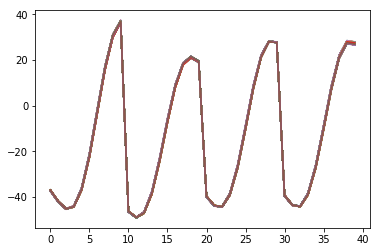

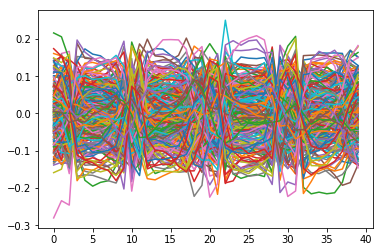

In [132]:
for j in range(256):
    plt.plot([i for i in range(40)], z_means[j,:])
plt.show()
for j in range(256):    
    plt.plot([i for i in range(40)], z_means_scaled[j,:])
plt.show()

In [ ]:
scaler.transform()

In [99]:
z.shape

(50000, 40)

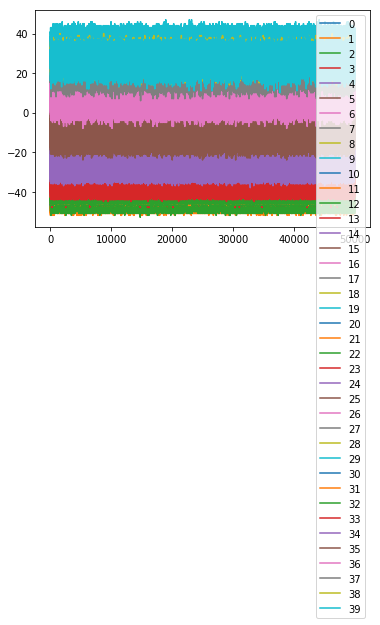

In [105]:
df_z = pd.DataFrame(z)
df_z.plot()
plt.show()

In [134]:
pca = PCA(n_components=40)

In [135]:
%time pca.fit(X)

CPU times: user 5.46 s, sys: 648 ms, total: 6.11 s
Wall time: 3.73 s


PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [136]:
XX = pca.transform(X)

In [137]:
XX.shape

(50000, 40)

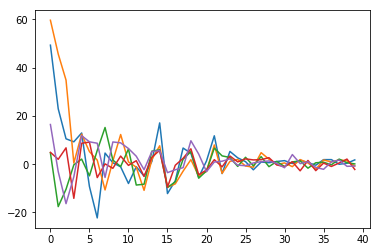

In [139]:
for i in range(5):
    plt.plot([i for i in range(40)], XX[i])
plt.show()

In [ ]:
mv = get_mean_vectors(X, y)

In [ ]:
dists = np.abs(pairwise_distances(mv, metric='euclidean'))

In [ ]:
scaler = StandardScaler()
dists_n = scaler.fit_transform(dists)


## Now we code a FeatureExtractor and a Classifier

In [140]:
# We reload the data just in case 
X, y = get_train_data()

In [141]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_vectors = None
        self.n = 50
        self.pca = PCA(n_components=self.n)

    def fit(self, X, y):
        new_X = X.copy()
        #self.mean_vectors = get_mean_vectors(new_X, y)
        #self.pca.fit(X, y)
        print('FeatureExtractor debug : Fitted (mean-v and pca)')
        return self

    def transform(self, X):
        new_X = X.copy()
        #pca_X = self.pca.transform(new_X)
        #new_X = np.abs(pairwise_distances(new_X, self.mean_vectors))
        #new_X = np.concatenate((new_X, pca_X), axis=1)
        print('FeatureExtractor debug : new X shape : '+str(new_X.shape))
        return new_X

def get_mean_vectors(X, y):
    print('FeatureExtractor debug : calling get_mean_vectors')
    mean_vectors = []
    
    for label in range(256):
        mean_vector = X[y==label].mean(axis=0)
        mean_vectors.append(mean_vector)
    
    return np.array(mean_vectors)

def get_sum(v, metric='euclidean'):
    print('FeatureExtractor debug : calling get_sum')
    return pairwise_distances(v, metric=metric).sum(axis=0)

In [142]:
from sklearn.base import BaseEstimator
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

class Classifier(BaseEstimator):
    def __init__(self):
        #self.clf = LogisticRegression(random_state=0, solver='lbfgs')
        #self.clf = make_pipeline(StandardScaler(), LogisticRegression(verbose=1))
        #self.clf = make_pipeline(StandardScaler(), GaussianNB())
        self.clf = GaussianNB()
        #self.clf = CatBoostClassifier(iterations=15, depth=4, learning_rate=1,verbose=True)
        #self.clf = SVC(kernel='linear', verbose=True)
        #self.clf = KNeighborsClassifier()
        
    def fit(self, X, y):
        self.clf.fit(X, y)
        
    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        y_pred_proba = self.clf.predict_proba(X)
        return y_pred_proba


Using TensorFlow backend.


# Testing

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from problem import AUTR

In [144]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [145]:
model = make_pipeline(FeatureExtractor(), Classifier())

In [146]:
%time model.fit(X_train, y_train)

FeatureExtractor debug : Fitted (mean-v and pca)
FeatureExtractor debug : new X shape : (35000, 700)
CPU times: user 1.19 s, sys: 158 ms, total: 1.35 s
Wall time: 1.16 s


Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('classifier', Classifier())])

In [147]:
%time predictions = model.predict_proba(X_valid)

FeatureExtractor debug : new X shape : (15000, 700)
CPU times: user 34.6 s, sys: 3.76 s, total: 38.4 s
Wall time: 19.9 s


In [148]:
scorer = AUTR()
print("Area Under The Rank : "+str(scorer(y_valid, predictions)))

Area Under The Rank : 114645


In [151]:
print(ranks.shape)

(999, 2)


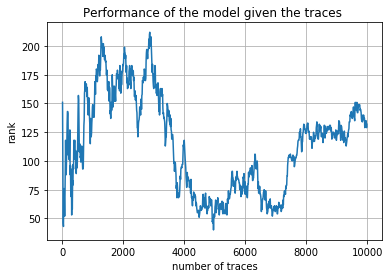

In [149]:
ranks = scorer.rankings

x = [ranks[i][0] for i in range(0, ranks.shape[0])]
y = [ranks[i][1] for i in range(0, ranks.shape[0])]
plt.title('Performance of the model given the traces ')
plt.xlabel('number of traces')
plt.ylabel('rank')
plt.grid(True)
plt.plot(x, y)
plt.show()
plt.figure()

In [ ]:

x = [ranks[i][0] for i in range(0, ranks.shape[0])]
y = [200 for _ in range(0, ranks.shape[0])]
plt.title('Performance of the model given the traces ')
plt.xlabel('number of traces')
plt.ylabel('rank')
plt.grid(True)
plt.plot(x, y)
plt.show()
plt.figure()